In [2]:
!pip install -q kagglehub xgboost scikit-learn pandas seaborn matplotlib

In [3]:
import kagglehub
path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")
print(path)


Using Colab cache for faster access to the 'crop-recommendation-dataset' dataset.
/kaggle/input/crop-recommendation-dataset


In [4]:
import pandas as pd
df = pd.read_csv(path + "/Crop_recommendation.csv")
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape
df.info()
df.isnull().sum()
df['label'].value_counts()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Figure size 1200x800 with 0 Axes>

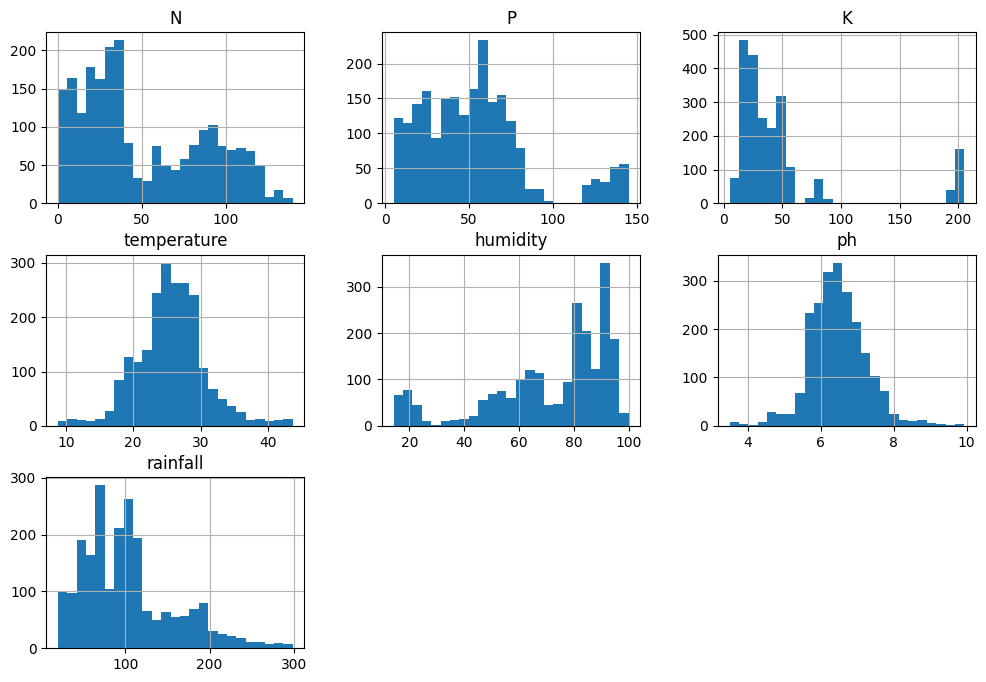

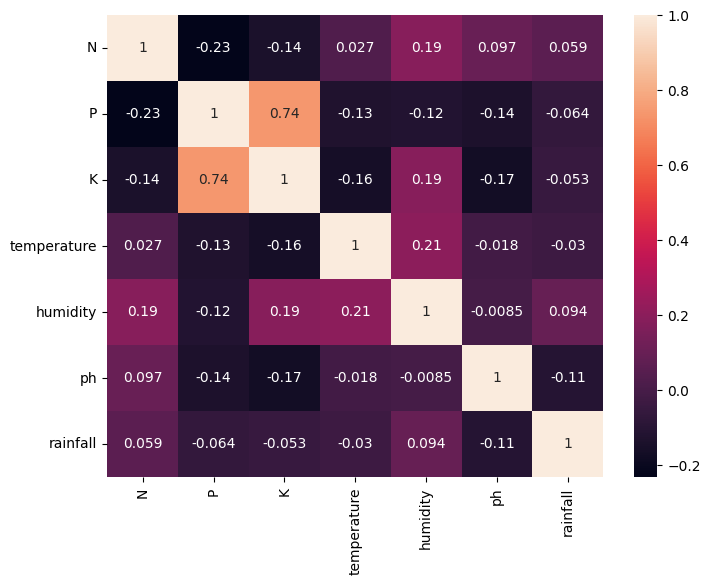

In [6]:
import matplotlib.pyplot as plt, seaborn as sns
num = ['N','P','K','temperature','humidity','ph','rainfall']
plt.figure(figsize=(12,8))
df[num].hist(bins=25, figsize=(12,8))
plt.show()
plt.figure(figsize=(8,6)); sns.heatmap(df[num].corr(), annot=True); plt.show()


In [7]:
def feature_engineer(data):
    data['NPK'] = (data['N']+data['P']+data['K'])/3
    data['THI'] = data['temperature']*data['humidity']/100
    data['rainfall_level'] = pd.cut(data['rainfall'], bins=[0,50,100,200,300], labels=['Low','Med','High','VeryHigh'])
    def ph_cat(p):
        return 'Acidic' if p<5.5 else ('Neutral' if p<=7.5 else 'Alkaline')
    data['ph_category'] = data['ph'].apply(ph_cat)
    data['temp_rain'] = data['temperature']*data['rainfall']
    data['ph_rain'] = data['ph']*data['rainfall']
    return data
df = feature_engineer(df)
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain,ph_rain
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,58.333333,17.121963,VeryHigh,Neutral,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,61.333333,17.485957,VeryHigh,Neutral,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,53.000000,18.937446,VeryHigh,Alkaline,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,49.666667,21.234829,VeryHigh,Neutral,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,54.000000,16.427204,VeryHigh,Alkaline,5288.545993,2004.132110


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])
df = pd.get_dummies(df, columns=['rainfall_level','ph_category'], drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['label','label_enc'], axis=1)
y = df['label_enc']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)


RF acc: 0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:57:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB acc: 0.9954545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20

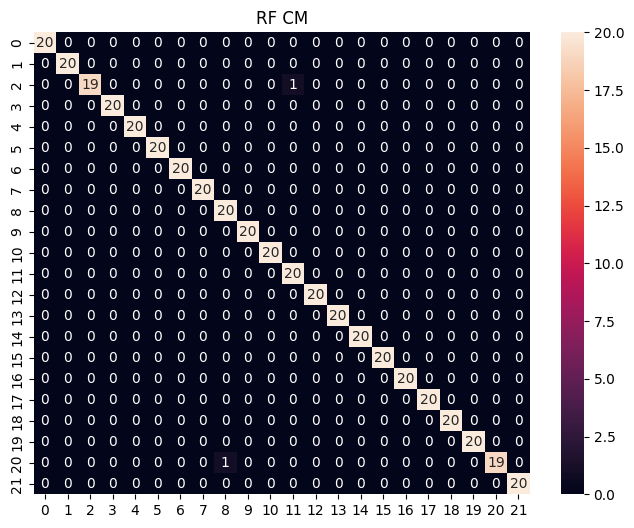

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1); rf.fit(X_train_s,y_train)
y_rf = rf.predict(X_test_s)
print("RF acc:", accuracy_score(y_test,y_rf)); print(classification_report(y_test,y_rf))
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42); xgb.fit(X_train_s,y_train)
y_xgb = xgb.predict(X_test_s)
print("XGB acc:", accuracy_score(y_test,y_xgb)); print(classification_report(y_test,y_xgb))
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(8,6)); sns.heatmap(confusion_matrix(y_test,y_rf), annot=True, fmt='d'); plt.title('RF CM'); plt.show()


In [11]:
imp = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
imp.head(10)
imp.to_csv('feature_importances.csv', index=False)
df.to_csv('preprocessed_crop_yield.csv', index=False)


In [12]:
from google.colab import files
files.download('preprocessed_crop_yield.csv')
files.download('feature_importances.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>